In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import importlib


import spatial_filter as sf # importing spatial filters library

lena_noisy_0.05_window3_median mmse: 168.4479354094579
lena_noisy_0.05_window5_median mmse: 366.2120985491971
lena_noisy_0.05_window7_median mmse: 541.4054664187848
lena_noisy_0.05_window9_median mmse: 708.8182988473167
lena_noisy_0.1_window3_median mmse: 208.7475201845444
lena_noisy_0.1_window5_median mmse: 370.5672933845868
lena_noisy_0.1_window7_median mmse: 544.5259260416503
lena_noisy_0.1_window9_median mmse: 709.7330050075586
lena_noisy_0.2_window3_median mmse: 910.7744521337947
lena_noisy_0.2_window5_median mmse: 392.3530132060264
lena_noisy_0.2_window7_median mmse: 559.5308823759159
lena_noisy_0.2_window9_median mmse: 709.451384952129


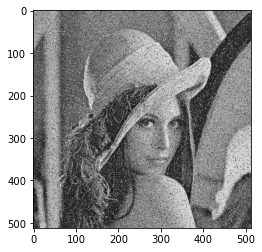

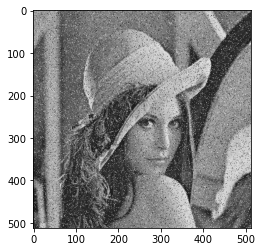

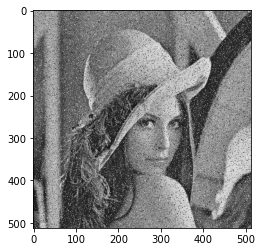

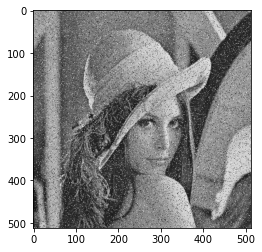

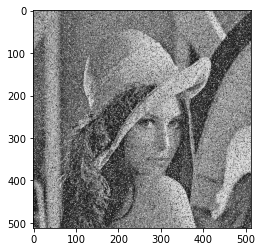

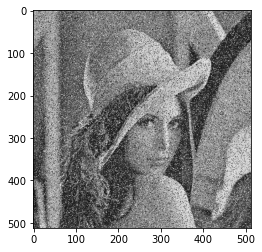

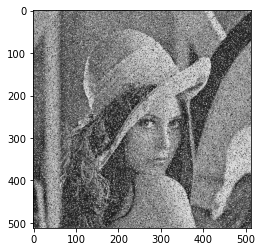

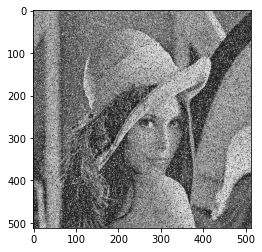

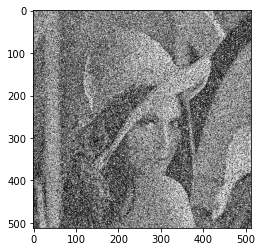

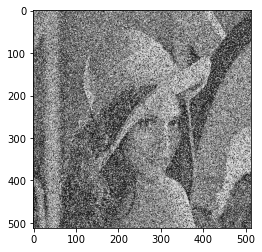

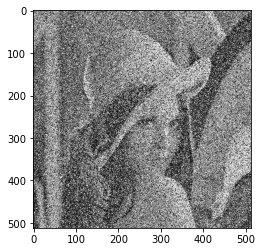

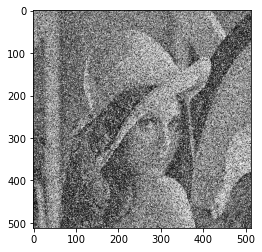

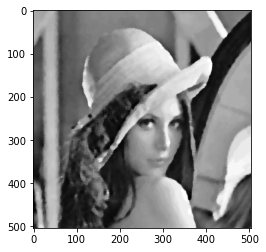

In [8]:
if __name__ == "__main__":
    noise_probabilty = [0.05 , 0.1 , 0.2]
    window_sizes = [3,5,7,9]
    image = cv2.cvtColor(cv2.imread('../Images/3/Lena.bmp'), cv2.COLOR_BGR2GRAY)
    for prob in noise_probabilty:
        for win_siz in window_sizes:
            
            noise_img = sf.sp_noise(image,prob)
            plt.imshow(noise_img , cmap='gray')
            cv2.imwrite(f'lena_noisy_{prob}.jpg', noise_img)
            median_filtered = sf.meadian_filtering_using_strides(noise_img, win_siz)
            plt.figure()
            plt.imshow(median_filtered , cmap='gray')
            cv2.imwrite(f'median_results/lena_noisy_{prob}_window{win_siz}_median.jpg', median_filtered)
            print(f'lena_noisy_{prob}_window{win_siz}_median mmse: {np.square(np.subtract(image[image.shape[0]-median_filtered.shape[0]:,image.shape[1]-median_filtered.shape[1]:],median_filtered)).mean()}')